In [9]:
# importing the class 
from imageembed import ImageEmbeddingProcessor

In [2]:
# user can choose a model for generating image embeddings
processor = ImageEmbeddingProcessor(model_name="openai/clip-vit-large-patch14")

In [3]:
# path to the pdf file to extract images from 
pdf_path = "./pdf_test_merged.pdf"  
extracted_images = processor.extract_images_with_pymupdf(pdf_path)
print(f"Extracted {len(extracted_images)} images.")


Extracted 4 images.


In [4]:
# save the embeddings 
image_embeddings = processor.get_image_embeddings(extracted_images)
processor.save_embeddings(image_embeddings)
print(f"Embeddings saved.")


Embeddings saved.


In [5]:
# load the embeddings
loaded_embeddings = processor.load_embeddings()
print("Sample Image Embedding:", loaded_embeddings[0][1][:10])

Sample Image Embedding: [0.7317027449607849, 0.7933259010314941, 0.24273790419101715, 0.15463116765022278, -0.46593183279037476, -0.41519513726234436, 0.17920374870300293, -0.5381836891174316, -0.07228344678878784, -0.9360332489013672]


In [6]:
# query for similar images
text_query = "cat"
similarities = processor.compute_similarity(loaded_embeddings, text_query)

In [7]:
# get top similar images
top_images = processor.get_top_similar_images(similarities, [item[0] for item in loaded_embeddings])
print(f"Most similar images to '{text_query}':")
for rank, (image_path, similarity) in enumerate(top_images):
    print(f"{rank+1}. {image_path} (Similarity: {similarity:.4f})")

Most similar images to 'cat':
1. extracted_images/image_page6_1.png (Similarity: 0.2268)
2. extracted_images/image_page2_1.png (Similarity: 0.1334)
3. extracted_images/image_page1_1.png (Similarity: 0.1003)


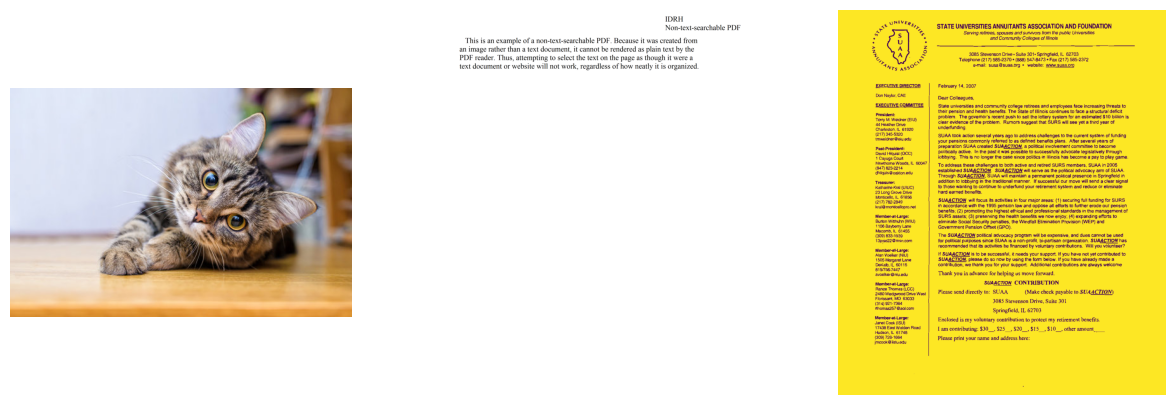

In [ ]:
# display the top similar images
processor.display_images([img[0] for img in top_images])